In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd 
import numpy as np
from numpy.random import default_rng
import risktools as rt

<AxesSubplot: >

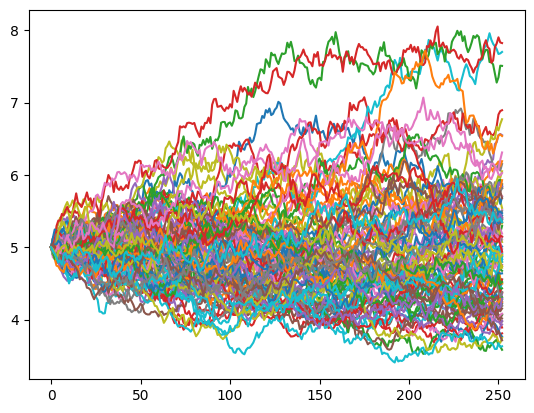

In [7]:
x = rt.simGBM_MV(s0=[5,5], r=0.01, sigma=[0.2,0.2], T=1, dt=1/252, cor=[[1,0],[0,1]], sims=100)
pd.DataFrame(x[:,:,0]).plot(legend=False)